In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm
from matplotlib import colors
from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import matplotlib as mpl

from scipy.spatial import ConvexHull

from highlight_text import fig_text

from config import *
from function import *

from urllib.request import urlopen
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

blackTheme

{'figBackColor': '#131313',
 'axBackColor': '#131313',
 'textColor': '#ededed',
 'homeColor': '#B94B5F',
 'awayColor': '#4A5EB8'}

In [3]:
teamId = 65
teamName = 'barcelona'
season = input("season: ....?")
gw = input("gameweek: ....?")
venue = int(input("venue:....?"))
venue = "home" if venue==0 else "away"

season: ....? 2223
gameweek: ....? 26
venue:....? 0


In [4]:
import pickle
with open(file=f'/work/assets/whoscored/{teamName}/ids/{season}/{season}#{gw}.json', mode="rb") as jfile:
    team_players_dict = pickle.load(jfile)

pdict = team_players_dict[venue].keys()
pdict = dict(pdict)

defs = []
mids = []
for key, val in team_players_dict[venue].items():
    if val in ["DR","DC","DL"]:
        defs.append(key)
    elif val in ["DMC","DMR","DML","AMC","AMR","AML","MC","MR","ML"]:
        mids.append(key)
        
pdict
# team_players_dict["away"]

{80774: 'Marc-André ter Stegen',
 301019: 'Jules Koundé',
 368091: 'Eric García',
 384711: 'Ronald Araújo',
 422938: 'Alejandro Balde',
 44721: 'Sergio Busquets',
 422937: 'Gavi',
 90782: 'Sergi Roberto',
 300447: 'Raphinha',
 29400: 'Robert Lewandowski',
 382234: 'Ansu Fati',
 44288: 'Jordi Alba',
 349760: 'Ferran Torres',
 277269: 'Franck Kessié',
 454343: 'Marc Casadó',
 445092: 'Pablo Torre',
 84008: 'Marcos Alonso',
 430512: 'Estanis Pedrola',
 367164: 'Iñaki Peña',
 478029: 'Aleix Garrido',
 476335: 'Ángel Alarcón',
 396147: 'Arnau Tenas'}

In [5]:
#Loading Some Fonts
smooch = "https://github.com/googlefonts/smooch/blob/master/fonts/ttf/Smooch-Regular.ttf?raw=true"
spaceMono_italy = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
spaceMono_dance = "https://github.com/googlefonts/moondance/tree/master/fonts/ttf?raw=true"
# smoochFont = FontManager(smooch)
monoIFont = FontManager(spaceMono_italy)
monoBFont = FontManager(spaceMono_bold)
# monoDFont = FontManager(spaceMono_dance)

pitch_color = '#131313'
text_color = '#ffffff'
oneColor = '#B94B5F'
theOtherColor = '#4A5EB8'

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, oneColor], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, theOtherColor], N=100)
myFont = monoIFont

URL = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
# URL2 = "https://upload.wikimedia.org/wikipedia/en/thumb/7/78/Netherlands_national_football_team_logo.svg/1200px-Netherlands_national_football_team_logo.svg.png"
URL2 = "https://upload.wikimedia.org/wikipedia/en/3/31/Spain_National_Football_Team_badge.png" 
# URL2 = "https://upload.wikimedia.org/wikipedia/en/thumb/e/e3/DFBEagle.svg/1200px-DFBEagle.svg.png" 
mark = Image.open(urlopen(URL))
mark2 = Image.open(urlopen(URL2))

In [6]:
df = pd.read_csv(f'/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{gw}.csv')
# df = df.fillna(0)
# df = df.dropna(subset=["endY"]).reset_index(drop=True)

xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

opponent = df.loc[0,"opponent"]
opponent

FileNotFoundError: [Errno 2] No such file or directory: '/work/assets/whoscored/barcelona/match/2223/eventsData/new/2223#26.csv'

In [47]:
df['x']=df['x']*1.2
df['endX']=df['endX']*1.2
df['y']=df['y']*0.8
df['endY']=df['endY']*0.8
df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)

# df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
# df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
# df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
# df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
# df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
# df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
# df["xT"] = df['end_zone_value'] - df['start_zone_value']

df = df[~df["satisfiedEventsTypes"].apply(str).str.contains("Corner",na=False)]

Carry: 15
CarryDist mean: 13.888283541677872


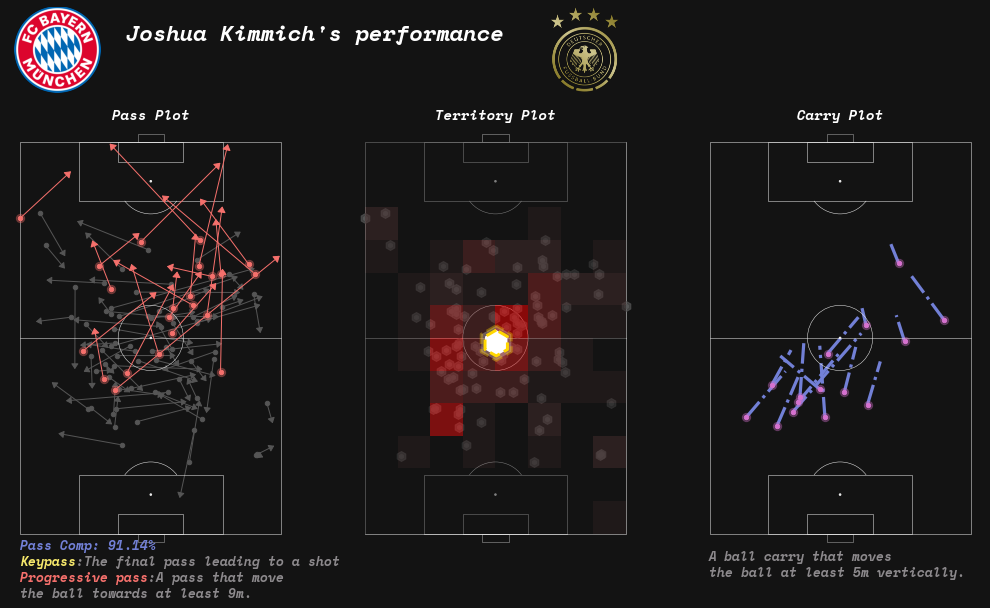

In [53]:
fig,axes = plt.subplots(1,3,figsize=(17.5,15))
fig.set_facecolor("#131313")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=20
)


for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()
tId = 37
pId = 283323

def calPassComp(df,playerId):
    passDf = df[df["playerId"]==playerId]
    passAc = passDf[passDf["satisfiedEventsTypes"].apply(str).str.contains("PassAccurate",na=False)]
    passIc = passDf[passDf["satisfiedEventsTypes"].apply(str).str.contains("PassInaccurate",na=False)]
    passComp = round((len(passAc)/(len(passAc)+len(passIc)))*100,2)
    return passComp

fig_text(s=f"<{pdict[pId]}'s performance>",
         x=axes[0].get_position().x0+.094,y=axes[0].get_position().y1+.03,
         color="#8C898C",
         highlight_colors=["#ffffff"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=22,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<{teamName.title()} vs {opponent} | LaLiga 21-22 | by@Bucciaratimes>",
         x=axes[0].get_position().x0+.094,y=axes[0].get_position().y1+.01,
         color="#8C898C",
         highlight_colors=["#a0a0a0"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=12,
         fontproperties=monoBFont.prop,fig=fig)

# fig_text(s=f"Convex hull represents the area \nwithin 1 standard devitation \nfrom the median location",
#          x=axes[1].get_position().x0+.01,y=axes[1].get_position().y0-.04,
#          color="#8C898C",
#          highlight_colors=["#a0a0a0"],
#          highlight_weights=["bold"],
#          highlight_styles=["italic"],
#          fontsize=13,
#          fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<Pass Comp: {calPassComp(df,pId)}%>\n<Keypass>:The final pass leading to a shot\n<Progressive pass>:A pass that move \nthe ball towards at least 9m.",
         x=axes[0].get_position().x0+.01,y=axes[0].get_position().y0-.05,
         color="#8C898C",
         highlight_colors=["#7280D6","#F5E76B","#F5706C"],
         highlight_weights=["bold","bold","bold"],
         highlight_styles=["italic","italic","italic"],
         fontsize=13,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"A ball carry that moves \nthe ball at least 5m vertically.",
         x=axes[2].get_position().x0+.01,y=axes[2].get_position().y0-.03,
         color="#8C898C",
         highlight_colors=["#a0a0a0"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=13,
         fontproperties=monoBFont.prop,fig=fig)

ax_image = add_image(
    mark, fig, left=axes[0].get_position().x0, bottom=axes[0].get_position().y1-.015, width=0.08, height=0.08)  
ax_image2 = add_image(
    mark2, fig, left=axes[0].get_position().x1+.19, bottom=axes[0].get_position().y1-.015, width=0.08, height=0.08)  

for i,title in zip(range(3),["Pass Plot","Territory Plot","Carry Plot"]):
    axes[i].text(s=title,color="#ffffff",x=40,y=128,fontsize=14,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)
    
plotVerticalAndKeyPassMap(df=df,playerId=pId,ax=axes[0],time=90)
# plotConvexfull(df=df,playerId=pId,ax=axes[1])
plotScatterMap(df=df,playerId=pId,ax=axes[1])
# plotDefensiveLine(df,ax=axes[1],defs=defs,mids=mids,teamId=tId)
# plotHeatMap(df=df,playerId=pId,pitch=pitch,ax=axes[1])
plotHeatMap2(df=df,playerId=pId,pitch=pitch,ax=axes[1],time=90)
# plotHeatMap2(df=df,playerId=pId,pitch=pitch,ax=axes[2],time=90,time2=45)

carryPlot(df,axes[2],teamId=tId,playerId=pId,carryDist=5)
plt.savefig(f'/work/output/{gw}-{pdict[pId]}-performance.png', dpi=250, bbox_inches="tight",facecolor='#131313')

In [40]:
df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
print(len(df[df["playerId"]==pId])/len(df[df["teamId"]==tId]))

0.1543026706231454


In [41]:
df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
print(len(df[df["playerId"]==279423])/len(df[df["teamId"]==tId]))

0.09050445103857567


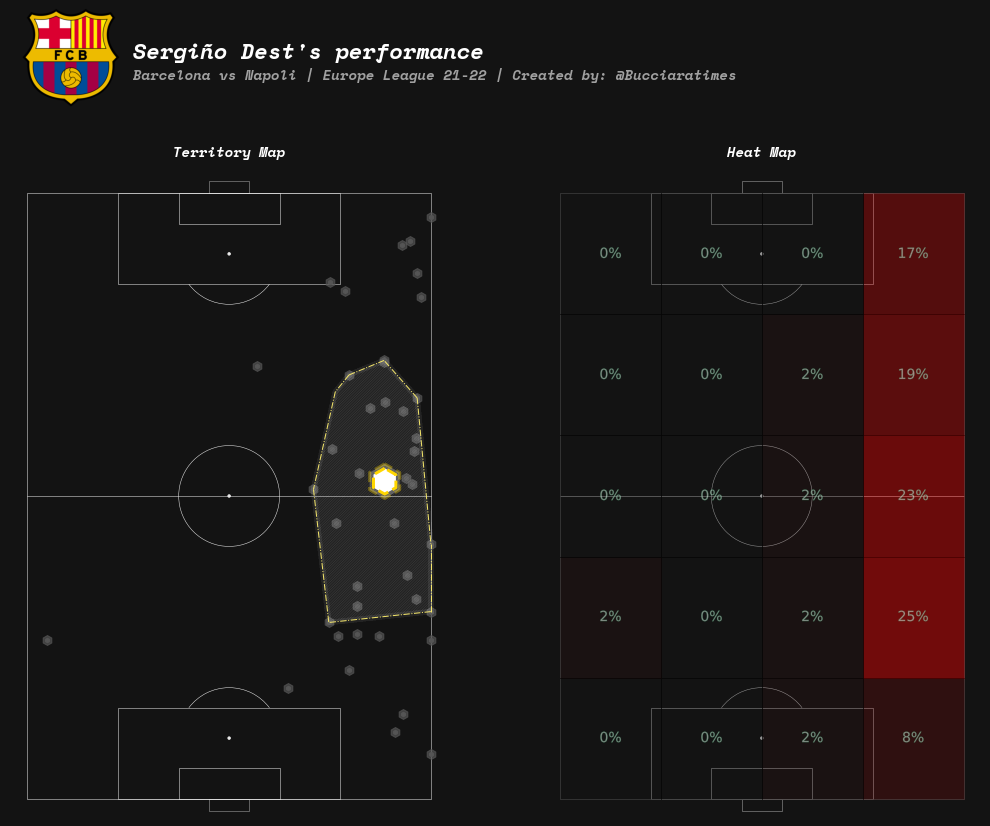

In [20]:
fig,axes = plt.subplots(1,2,figsize=(17.5,14))
fig.set_facecolor("#131313")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=20
)


for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    
# Pocket 
# fig.patches.extend([
#     plt.Rectangle(
#         (.21,.640),.0515,.103,fill=True, color="#80ffdb", alpha=.2,
#         transform=fig.transFigure, figure=fig
#     )
# ])

# fig.patches.extend([
#     plt.Rectangle(
#         (.341,.640),.0515,.103,fill=True, color="#80ffdb", alpha=.2,
#         transform=fig.transFigure, figure=fig
#     )
# ])

# fig.patches.extend([
#     plt.Rectangle(
#         (.763,.640),.0515,.103,fill=True, color="#80ffdb", alpha=.2,
#         transform=fig.transFigure, figure=fig
#     )
# ])

# fig.patches.extend([
#     plt.Rectangle(
#         (.6335,.640),.0515,.103,fill=True, color="#80ffdb", alpha=.2,
#         transform=fig.transFigure, figure=fig
#     )
# ])

# # dotted
# fig.patches.extend([
#     plt.Rectangle(
#         (.65,.475),.055,.05,fill=False, alpha=1,
#         linestyle="-.", edgecolor="#D7B013", linewidth=3, zorder=99,
#         transform=fig.transFigure, figure=fig
#     )
# ])

# comment
# fig.patches.extend([
#     plt.Rectangle(
#         (.77,.37),.07,.35,fill=False, alpha=1,
#         linestyle="-.", edgecolor="#E4471B", linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig
#     )
# ])
# fig.patches.extend([
#     plt.Rectangle(
#         (.624,.67),.2,.05,fill=False, alpha=1,
#         linestyle="-.", edgecolor="#E4471B", linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig
#     )
# ])

# fig.patches.extend([
#     plt.Rectangle(
#         (.19,.37),.07,.35,fill=False, alpha=1,
#         linestyle="-.", edgecolor="#E4471B", linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig
#     )
# ])
# fig.patches.extend([
#     plt.Rectangle(
#         (.2,.67),.2,.05,fill=False, alpha=1,
#         linestyle="-.", edgecolor="#E4471B", linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig
#     )
# ])
# axes[1].text(
#     45.8, 98.26, "during the 16 minutes he", size=11,
#     fontproperties=myFont.prop, color="white",fontweight="bold"
# )

# Suc/Unsuc
# fig.patches.extend([
#     plt.Rectangle(
#         (.35,.82),.018,.021,fill=True, color="#7400b8",
#         transform=fig.transFigure, figure=fig
#     )
# ])
# fig.patches.extend([
#     plt.Rectangle(
#         (.56,.82),.018,.021,fill=True, color="#76c893",
#         transform=fig.transFigure, figure=fig
#     )
# ])

# axes[0].scatter(50.13,131.4,color="#13B9D6",s=100)  
# axes[0].scatter(50.13,131.4,color="#13B9D6",s=350,alpha=.3)  

# axes[0].scatter(-2.13,131.4,color="#e76f51",s=100)  
# axes[0].scatter(-2.13,131.4,color="#e76f51",s=350,alpha=.3)  

# axes[1].scatter(50.29,131.4,color="#D61327",s=100)  
# axes[1].scatter(50.29,131.4,color="#D61327",s=350,alpha=.3)  

# myFont = robot_bold
# fig.text(  
#     0.375, 0.82, "Unsuccessful                                           Successful", size=16,
#     fontproperties=myFont.prop, color="white"
# )

# axes[0].text(  
#     48.165, 130.26, "  Normal Pass                                           Good Pass", size=16,
#     fontproperties=myFont.prop, color="white"
# )
# axes[1].text(  
#     48.165, 130.26, "  Great Pass", size=16,
#     fontproperties=myFont.prop, color="white"
# )


# fig_text(s=f"<Frenkie de Jong> vs <{opponent}>",
#          x=.375,y=.875,
#          color="#8C898C",
#          highlight_colors=[homeColor,awayColor],
#          highlight_weights=["regular","regular"],
#          fontsize=22,
#          fontproperties=myFont.prop,fig=fig)

# fig_text(s="                                                                    I think this map shows their difference. \
# \n         In case they don't have space, <O.dembele> prefer to play inner zone and exploit space behind CBs with pass,\
# \n            becauce he's not good at dribble in small space. On the other hand, <E.Abde> prefer to play in wide lane,\
# \nbecause he's not good at play inner zone but he can dribble the ball past opponents with ease even if he don't have space.",
#          x=.2,y=.85,
#          color="#aaaaaa",
#          highlight_colors=[homeColor,awayColor],
# #          highlight_weights=['regular',"regular"],
#          fontsize=15,
#          fontproperties=myFont.prop,fig=fig)

cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#131313","red"])
axes[0].invert_xaxis()
axes[1].invert_xaxis()

tId = 65
pId = 379205

fig_text(s=f"<{pdict[pId]}'s performance>",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.03,
         color="#8C898C",
         highlight_colors=["#ffffff"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=22,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<{teamName.title()} vs {opponent} | Europe League 21-22 | Created by: @Bucciaratimes>",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.01,
         color="#8C898C",
         highlight_colors=["#a0a0a0"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

ax_image = add_image(
    mark, fig, left=axes[0].get_position().x0, bottom=axes[0].get_position().y1-.015, width=0.1, height=0.1)  

for i,title in zip(range(3),["Territory Map","Heat Map"]):
    axes[i].text(s=title,color="#ffffff",x=40,y=128,fontsize=14,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)
    

plotScatterMap(df=df,playerId=pId,ax=axes[0],time=90)
# plotPassMap(df=df,playerId=279423,ax=axes[0],time=90)
# plotHeatMap(df=df,playerId=5780,ax=axes[1])
plotBinStatHeatmap(df=df,playerId=pId,pitch=pitch,ax=axes[1],font=myFont,cmap=cmap,alpha=.4)
# plotPassMap(df=df,playerId=44288,ax=axes[1],time=90)
# plotBinStatHeatmap(df=df,playerId=299513,pitch=pitch,ax=axes,idx=1,font=myFont)
plotConvexfull(df=df,playerId=pId,ax=axes[0])
# plotHexbin(pitch,df,playerId=427283,ax=axes[0],time=90)
# plotHexbin(pitch,df,playerId=299513,ax=axes[1],time=90)

# from matplotlib.patches import Circle
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

# ada = AnchoredDrawingArea(40, 20, 0, 0,
#                           loc='upper right', pad=0., frameon=False)
# p1 = Circle((100, 100), 100)
# ada.drawing_area.add_artist(p1)
# p2 = Circle((100, 20), 10, fc="r")
# ada.drawing_area.add_artist(p2)
# axes[0].add_artist(ada)

plt.savefig(f'/work/output/{pId}.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [7]:
def plotPassMap(df,playerId,ax,time=None):
    pdf = df[df['playerId']==playerId]    
    if time is not None:
        pdf = pdf[pdf["minute"]<time]
        
    x = pdf['x']
    y = pdf['y']
    endX = pdf['endX']
    endY = pdf['endY']

    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#e76f51","#D61327"])
    color = cmap(pdf["xT"]/pdf["xT"].max())
    
#     ax.scatter(y,x,color="#dc2f02",s=30)  
#     ax.scatter(y,x,color="#ffba08",s=80,alpha=.3)   

    ax.scatter(y,x,color=color,s=100,zorder=1)  
    ax.scatter(y,x,color=color,s=350,alpha=.3,zorder=1)  
    
    for index, row in pdf.iterrows():
        if row["dist"] > 36.57:
            if 'passAccurate' in row["satisfiedEventsTypes"]:
                ax.annotate("",
                       xy=(row['endY'], row['endX']),xytext=(row["y"],row["x"]),
                       arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                   'fc':'#76c893',
                                   'ec':'#76c893',
                                    "connectionstyle":"angle3, angleA = 0, angleB = 95"
                                    #"connectionstyle":"arc, angleA = 90, angleB = 0"
                                  })
 
            elif "PassInaccurate" in row["satisfiedEventsTypes"]:
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                        'fc':"#7400b8",
                                        'ec':"#7400b8",
                                        "connectionstyle":"angle3, angleA = 0, angleB = 95"})

        else:
            if 'passAccurate' in row["satisfiedEventsTypes"]:
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                        'fc':'#76c893',
                                        'ec':'#76c893'},
                            zorder=1)
                            
            elif "PassInaccurate" in row["satisfiedEventsTypes"]:
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                        'fc':"#7400b8",
                                        'ec':"#7400b8"},
                            zorder=1)
                
    return None

def plotVerticalAndKeyPassMap(df,playerId,ax,time=None):
    pdf = df[df['playerId']==playerId]    
    if time is not None:
        pdf = pdf[pdf["minute"]<time]

    pdf['dist1']=np.sqrt((120-pdf.x)**2 + (40-pdf.y)**2)
    pdf['dist2']=np.sqrt((120-pdf.endX)**2 + (40-pdf.endY)**2)
    pdf['distdiff'] = pdf['dist1']-pdf['dist2']

    for index, row in pdf.iterrows():
        
        if 'passKey' in row["satisfiedEventsTypes"]:
            ax.scatter(row["y"],row["x"],color="#F5E76B",s=20,zorder=1)  
            ax.scatter(row["y"],row["x"],color="#F5E76B",s=70,alpha=.3,zorder=1) 
            ax.annotate("",
                        xy=(row['endY'],row['endX']),
                        xytext=(row["y"],row["x"]),
                        arrowprops={'arrowstyle':"-|>,head_width=.35,head_length=.5",
                                    'fc':'#F5E76B','ec':'#F5E76B'},
                        zorder=1)
            
        elif ((row["x"]<60)&(row["endX"]<60)&(row["distdiff"]>=30)) | \
           ((row["x"]<60)&(row["endX"]>60)&(row["distdiff"]>=15)) | \
           ((row["x"]>60)&(row["endX"]>60)&(row["distdiff"]>=7)):  #30 15 10
#             if 'passAccurate' in row["satisfiedEventsTypes"]: 
                ax.scatter(row["y"],row["x"],color="#F5706C",s=20,zorder=1)  
                ax.scatter(row["y"],row["x"],color="#F5706C",s=70,alpha=.3,zorder=1) 
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.35,head_length=.5",
                                        'fc':'#F5706C','ec':'#F5706C'},
                            zorder=1)
                
        elif ('passAccurate' in row["satisfiedEventsTypes"]) | ("passInaccurate" in row["satisfiedEventsTypes"]):
                ax.scatter(row["y"],row["x"],color="#555555",s=20,zorder=.5)  
#                 ax.scatter(row["y"],row["x"],color="#777777",s=70,alpha=.3,zorder=.5) 
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.3,head_length=.45",
                                        'fc':'#555555',
                                        'ec':'#555555'},
                            zorder=.5)
    

def plotScatterMap(df,playerId,ax,time=None):
    df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    pdf = df[df['playerId']==playerId]    
    if time is not None:
        pdf = pdf[pdf["minute"]<time]
        
    x = pdf['x']
    y = pdf['y']
    endX = pdf['endX']
    endY = pdf['endY']
    meanX = pdf["x"].median()
    meanY = pdf["y"].median()
    
    ax.scatter(y,x,color="#555555",s=20,marker="h",zorder=1)  
    ax.scatter(y,x,color="#555555",s=100,marker="h",alpha=.7,zorder=1) 
#     ax.scatter(meanY,meanX,color=awayColor,s=200,marker="h",zorder=1)
#     ax.scatter(meanY,meanX,color=home,s=450,marker="h",alpha=.3,zorder=1)
    ax.scatter(meanY,meanX,facecolor="#cccccc",edgecolor='gold',s=300*4, 
        marker="h",alpha=.35,
        linewidth=3,linestyle="--",
        zorder=99)
    ax.scatter(meanY,meanX,facecolor="#ffffff",edgecolor='gold',s=335*2, 
        marker="h",alpha=1,
        linewidth=3,linestyle="--",
        label='Mål',zorder=99)
#     ax.annotate(f"{pdict[playerId]}",
#                             xy=(meanY,meanX),
#                             xytext=(meanY,meanX-5),
#                             fontweight="bold",
#                             arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
#                                            'fc':"white",
#                                            'ec':"white"},
#                             zorder=1)
    #ax.scatter(endY,endX,cmap=colorB,s=100,zorder=1)  
    #ax.scatter(endY,endX,cmap=colorB,s=350,alpha=.3,zorder=1)  
    
    return None

def passSonerMap(df,playerId,ax):
    pdf = df[df['playerId']==playerId]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#D61327"])
    colors = cmap(pdf['count']/pdf['count'].max())
    multiplier = 2*np.pi/24
    bars = ax.bar(pdf['angle_bin']*multiplier, 
                   pdf['avg_length'], 
                   width=0.2, 
                   bottom=0, 
                   alpha=0.9, 
                   color=colors,
                   zorder=3)
    
    ax.set_xticklabels([])
    ax.set_yticks([])
    # ax_sub.grid(True, alpha=.5)
    ax.grid(False)
    # ax_sub.spines['polar'].set_visible(True)
    ax.spines['polar'].set_visible(False)

    # ax_sub.spines['polar'].set_color(main_color)
    ax.patch.set_alpha(0)
#     return axes
    return ax   

def plotHeatMap(df,playerId,ax):
    df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    if playerId is not None:
        pdf = df[df['playerId']==playerId]
    pdf = df
    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#D61327"])
    
    kde = sns.kdeplot(
        pdf['y'],
        pdf['x'],
        shade=True,
        shade_lowest=False,
        alpha=.9,
        n_lavels=10,
        cmap=cmap,
        ax=ax) 
#     pos.invert_xaxis()
    return None

def plotConvexfull(df,playerId,ax):
    df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    pdf = df[df['playerId']==playerId]
    maxX,maxY = pdf[["x","y"]].mean() + pdf[['x','y']].std()
    minX,minY = pdf[["x","y"]].mean() - pdf[['x','y']].std()
    covX = []
    covY = []
    for index, row in pdf.iterrows():
        if row["x"] < maxX and row["y"] < maxY:
            if row["x"] > minX and row["y"] > minY:
                covX.append(row["x"])
                covY.append(row["y"])
        else:
            continue

    covDf = pd.DataFrame(columns=["x","y"])
    covDf["x"] = covX
    covDf["y"] = covY
    
    points = covDf[['x','y']].values
    if len(points) > 2:
        hull = ConvexHull(covDf[['x','y']])
        for simplex in hull.simplices:
#             ax.scatter(points[:,1],points[:,0],color="blue")
            ax.plot(points[simplex,1],points[simplex,0],linestyle='-.',color="#F5E76B",linewidth=1)
#             ax.plot(points[hull.vertices,1],points[hull.vertices,0],linestyle='-.',color="white",linewidth=.3)
            ax.fill(points[hull.vertices,1],points[hull.vertices,0],fc="white",ec='white',linewidth=6,hatch="///"*3,alpha=.01)
    else:
        pass
#         pos.scatter(points[:,1],points[:,0],color='blue',s=8)
#     pos.set_title(name,color=whiteTheme["textColor"],fontweight='bold',fontsize=12)
    
def plotBinStatHeatmap(pitch,ax,df,playerId,font,cmap,alpha):
    pdf = df[df['playerId']==playerId]
    
    # bin_statistic = pitch.bin_statistic_positional(df["x"], df["y"], statistic='count',
    #                                               positional='full', normalize=True)

    # pitch.heatmap_positional(bin_statistic, ax=ax['pitch'][idx],
    #                         cmap=cmap, edgecolors='#495E62',alpha=1, linewidth=.05)

    # labels = pitch.label_heatmap(bin_statistic, color=text_color, fontsize=18,
    #                             ax=ax['pitch'][idx], ha='center', va='center',
    #                             str_format='{:.0%}',fontproperties=font.prop)

    stats = pitch.bin_statistic(pdf["x"], pdf["y"], 
                                statistic='count', 
                                normalize=True)
    
    pitch.heatmap(stats, edgecolors='black',cmap=cmap,ax=ax,alpha=alpha)
    
    path_eff = [path_effects.Stroke(linewidth=0.5, foreground='seagreen')]
    
    text = pitch.label_heatmap(stats,
                               color='white',
                               ax=ax,
                               fontsize=14, 
                               ha='center',
                               va='center',
                               alpha=.5,
                               path_effects=path_eff,
                               str_format='{:.0%}')
    
def plotHeatMap2(df,ax):
    cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color,"#442D2D", "#852626", "#CB1C1C", "#FF0000"], N=100)
    stats = pitch.bin_statistic(df["x"], df["y"], bins=(12,8))
    pitch.heatmap(stats, edgecolors='none', cmap=cmapA, alpha=.5, ax=ax)
    
def plotHexbin(pitch,df,playerId,ax,time=None):
    pdf = df[df['playerId']==playerId]
    x = pdf["endX"]
    y = pdf["endY"]
    cmap = colors.ListedColormap(["#222222", "#2A2224", "#3A2027", "#421F28", "#54202B", "#65202E", "#782231",
                              "#892433", "#9B2838", "#AC2B3A", "#BE2F3E", "#CF3341", "#E13746"])
    pitch.hexbin(x, y, edgecolors='white', gridsize=(20, 9), cmap=cmap, ax=ax, bins="log")
    
def plotDefensiveLine(df,ax,defs,mids,teamId=65,time=None,color=None):
    if teamId is not None:
        df = df[df["teamId"]!=teamId]
    elif time is not None:
        if isinstance(time,tuple):
            if len(time)==2:
                if time[0] < time[1]:
                    early = time[0]
                    later = time[1]
                else:
                    early = time[1]
                    later = time[0]
                    
                df = df[(df["minute"]>=early)&(df["minute"]<=later)]               
            else:
                raise Exception
        else:        
            df = df[df["minute"]<=time]
        
    df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]        
    dfD = df[(df["playerId"]==defs[0][0])|(df["playerId"]==defs[1][0])|(df["playerId"]==defs[2][0])|(df["playerId"]==defs[3][0])]
    dfM = df[(df["playerId"]==mids[0][0])|(df["playerId"]==mids[1][0])|(df["playerId"]==mids[2][0])|(df["playerId"]==mids[3][0])|(df["playerId"]==mids[4][0])]
    
    dAveX = dfD["x"].median()
    dAveY = dfD["y"].mean()
    mAveX = dfM["x"].median()
    mAveY = dfM["y"].mean()
    ax.plot((0,80),(120-dAveY,120-dAveY),"#14FFFF",linestyle = "-.",linewidth=1.2)
    ax.plot((0,80),(120-mAveY,120-mAveY),"#14FFFF",linestyle = "-.",linewidth=1.2)

NameError: name 'robot_bold' is not defined

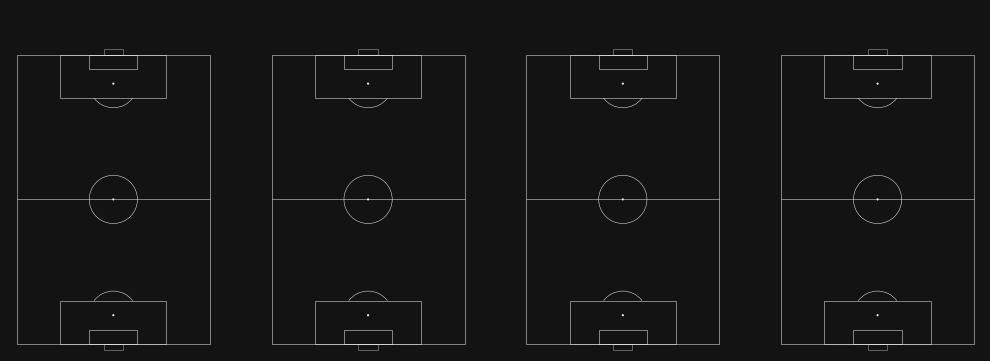

In [8]:
def plotBinStatHeatmapEnd(pitch,ax,idx,df,playerId,font):
    pdf = df[df['playerId']==playerId]

    stats = pitch.bin_statistic(pdf["endX"], pdf["endY"], 
                                statistic='count', 
                                normalize=True)
    
    pitch.heatmap(stats, edgecolors='black', cmap=cmapA, ax=ax[idx])
    
    path_eff = [path_effects.Stroke(linewidth=0.5, foreground='seagreen')]
    
    text = pitch.label_heatmap(stats,
                               color='white',
                               ax=ax[idx],
                               fontsize=20, 
                               ha='center',
                               va='center',
                               path_effects=path_eff,
                               str_format='{:.0%}')
    
def plotBinStatHeatmapStart(pitch,ax,idx,df,playerId,font):
    pdf = df[df['playerId']==playerId]

    stats = pitch.bin_statistic(pdf["x"], pdf["y"], 
                                statistic='count', 
                                normalize=True)
    
    pitch.heatmap(stats, edgecolors='black', cmap=cmapB, ax=ax[idx])
    
    path_eff = [path_effects.Stroke(linewidth=0.5, foreground='seagreen')]
    
    text = pitch.label_heatmap(stats,
                               color='white',
                               ax=ax[idx],
                               fontsize=20, 
                               ha='center',
                               va='center',
                               path_effects=path_eff,
                               str_format='{:.0%}')

fig,axes = plt.subplots(1,4,figsize=(17.5,9))
fig.set_facecolor("#131313")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=20
)

axes = axes.ravel()

for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    

myFont = robot_bold

axes[0].text(   
    48.165, 130.26, "Start", size=18,
    fontproperties=myFont.prop, color=awayColor
)
axes[1].text(  
    48.165, 130.26, " End", size=18,
    fontproperties=myFont.prop, color=homeColor
)

axes[2].text(   
    48.165, 130.26, "Start", size=18,
    fontproperties=myFont.prop, color=awayColor
)
axes[3].text(  
    48.165, 130.26, " End", size=18,
    fontproperties=myFont.prop, color=homeColor
)


fig_text(s="Abde Ezzalzouli vs Ousmane Dembélé",
         x=.37,y=.855,
         color="#8C898C",
#          highlight_colors=[awayColor,homeColor],
#          highlight_weights=['regular',"regular"],
         fontsize=22,
         fontproperties=myFont.prop,fig=fig)

# fig_text(s="                                                                    I think this map shows their difference. \
# \n         In case they don't have space, <O.dembele> prefer to play inner zone and exploit space behind CBs with pass,\
# \n            becauce he's not good at dribble in small space. On the other hand, <E.Abde> prefer to play in wide lane,\
# \nbecause he's not good at play inner zone but he can dribble the ball past opponents with ease even if he don't have space.",
#          x=.2,y=.85,
#          color="#aaaaaa",
#          highlight_colors=[homeColor,awayColor],
# #          highlight_weights=['regular',"regular"],
#          fontsize=15,
#          fontproperties=myFont.prop,fig=fig)

axes[0].invert_xaxis()
axes[1].invert_xaxis()
axes[2].invert_xaxis()
axes[3].invert_xaxis()

plotBinStatHeatmapStart(df=df,playerId=427283,pitch=pitch,ax=axes,idx=0,font=myFont)
plotBinStatHeatmapEnd(df=df,playerId=427283,pitch=pitch,ax=axes,idx=1,font=myFont)

plotBinStatHeatmapStart(df=df,playerId=299513,pitch=pitch,ax=axes,idx=2,font=myFont)
plotBinStatHeatmapEnd(df=df,playerId=299513,pitch=pitch,ax=axes,idx=3,font=myFont)

# plt.savefig('/work/output/passPer.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [53]:

team_name = "barcelona"
season = 2223
gw = 26
df = pd.read_csv(f'/work/assets/whoscored/{team_name}/match/{season}/eventsData/{season}#{gw}.csv')
df = df.fillna(0)
df = df.dropna(subset=["endY"]).reset_index(drop=True)

import pickle
with open(file=f'/work/assets/whoscored/{team_name}/ids/{season}/{season}#{gw}.json', mode="rb") as jfile:
    team_players_dict = pickle.load(jfile)

xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

df['x']=df['x']*1.2
df['endX']=df['endX']*1.2
df['y']=df['y']*0.8
df['endY']=df['endY']*0.8

df[df["satisfiedEventsTypes"].apply(str).str.contains("passAccurate",na=False)]
df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["xT"] = df['end_zone_value'] - df['start_zone_value']

cdf = df[df["teamId"] == 65]
cdf = cdf[["playerId", "x", "y", "endX", "endY"]]
cdf['startX'] = cdf['endX'].shift(+1)
cdf['startY'] = cdf['endY'].shift(+1)
cdf['carry1'] = np.sqrt((120 - cdf.startX)**2 + (40 - cdf.startY)**2)
cdf['carry2'] = np.sqrt((120 - cdf.x)**2 + (40 - cdf.y)**2)
cdf['carrydist'] = cdf['carry1'] - cdf['carry2']
cdf = cdf.dropna()
cdf["x_bin"] = pd.cut(x=cdf["startX"],bins=xT_cols,labels=False)
cdf["y_bin"] = pd.cut(x=cdf["startY"],bins=xT_rows,labels=False)
cdf["endX_bin"] = pd.cut(x=cdf["x"],bins=xT_cols,labels=False)
cdf["endY_bin"] = pd.cut(x=cdf["y"],bins=xT_rows,labels=False)
cdf["start_zone_value"] = cdf[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
cdf["end_zone_value"] = cdf[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
cdf["xT"] = cdf['end_zone_value'] - cdf['start_zone_value']


# df = df[df["teamId"]==65]
xTBar = df.groupby(by=["playerId"])["xT"].mean()
xTBar2 = cdf.groupby(by=["playerId"])["xT"].mean()

playersHome = []
xTHome = []
playersAway = []
xTAway = []
for pid in xTBar.index:
    for i in team_players_dict["home"].keys():
        if pid in i:
            playersHome.append(i[1])
            xTHome.append(xTBar.loc[i[0]])            
            
for pid in xTBar.index:
    for i in team_players_dict["away"].keys():
        if pid in i:
            playersAway.append(i[1])
            xTAway.append(xTBar.loc[i[0]])


In [54]:
df = pd.concat([df,cdf]).drop_duplicates()
len(df[(df["playerId"]==300447) & (df["xT"] >= 0)]["xT"]), len(df[(df["playerId"]==300447) & (df["xT"] < 0)]["xT"])

(81, 51)

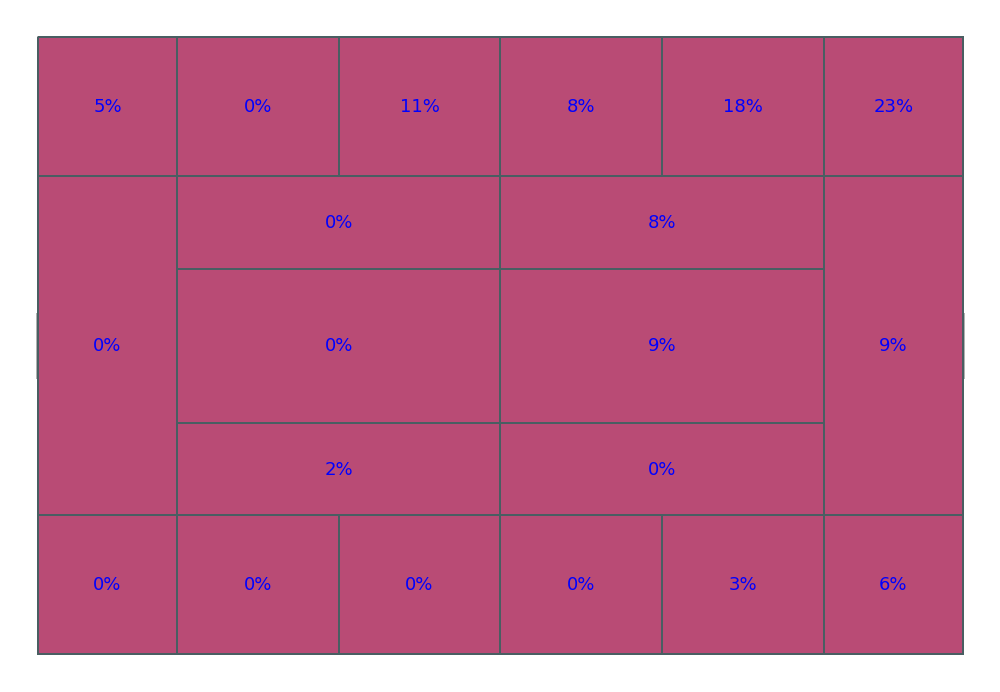

In [65]:
# xTBar = pd.concat([xTBar, xTBar2]) #.groupby(by="playerId").sum()
# xTBar.drop_duplicates().loc[300447]
# fig,ax = plt.subplots(2,2,figsize=(11,9))
# fig.set_facecolor("#fefefe")
# ax = ax.ravel()
# ax[:].set_facecolor("white")
# pie = ax[0].pie(
#     [len(df[(df["playerId"]==300447) & (df["xT"] >= 0)]["xT"]), len(df[(df["playerId"]==300447) & (df["xT"] < 0)]["xT"])],
#     textprops={"color":text_color, 'size':15, "fontweight":"bold", "fontproperties":myFont.prop},
#     wedgeprops={"lw":2, "ec":"#131313"},
#     labels=["Plus", "Minus"],
#     counterclock=False, startangle=90,
#     autopct='%1.1f%%', pctdistance=0.6,
#     colors=["#FF6978","#7569FF"],
#     labeldistance=0.2,
# )

from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)

cmap = create_transparent_cmap(color='#b94b75', n_segments=100, alpha_start=0.5, alpha_end=1)

pitch = Pitch()
fig, ax = pitch.draw(figsize=(14, 12))
df = df[df["playerId"]==300447]
angle, distance = pitch.calculate_angle_and_distance(df.x, df.y,
                                                     df.endX, df.endY,
                                                     standardized=False, degrees=True)

# sc = pitch.scatter(df.endX, df.endY, rotation_degrees=angle,
#                    c='#b94b75',  # color for scatter in hex format
#                    edgecolors='#383838', alpha=0.9,
#                    s=(distance / distance.max()) * 900, ax=ax, marker=arrowhead_marker)


# pitch.lines(xstart=df.x, ystart=df.y, xend=df.endX, yend=df.endY, comet=True, transparent=True, ax=ax)

bin_statistic = pitch.bin_statistic_positional(df["x"], df["y"], statistic='count', positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic, ax=ax,
                         cmap=cmap, edgecolors='#495E62',alpha=1, linewidth=.05)

labels = pitch.label_heatmap(bin_statistic, color="blue", fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}')

In [51]:
df1 = pd.read_csv(f"/work/assets/fbref/leagueStats/liga/2223/keeper.csv")
df2 = pd.read_csv(f"/work/assets/fbref/leagueStats/liga/2223/keeper_adv.csv")
df = df1.merge(df2, how="inner", on=["Player", "Nation"], suffixes=["", "_duplicated"])
not_duplicated_cols = [col for col in df.columns if not "_duplicated" in col]
df = df[not_duplicated_cols]
not_90_min_cols = [col for col in df.columns if not "90" in col and not "Per90" in col and not "%" in col and not "Goal-xG(non-pen)" in col and not "xG Plus/Minus" in col]
df.loc[:,not_90_min_cols[11]:] = df.loc[:,not_90_min_cols[11]:].apply(lambda x: x / df["90s"])


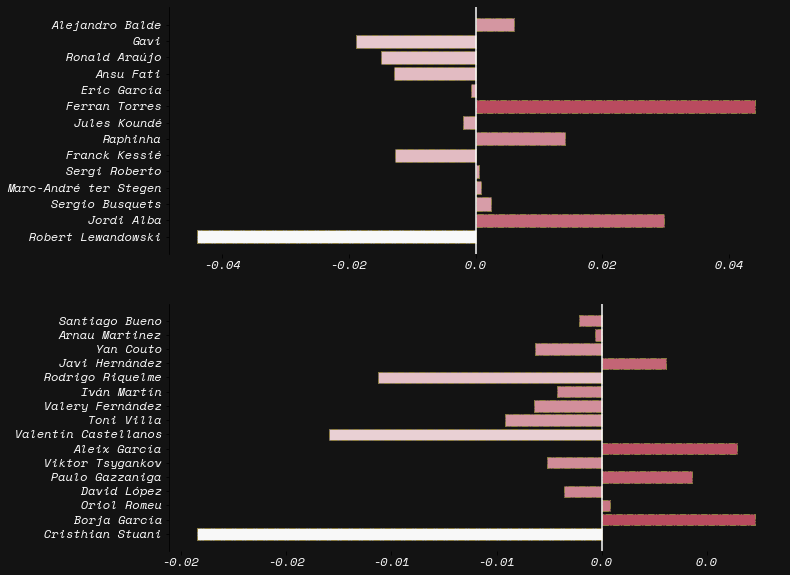

In [10]:
fig,axes = plt.subplots(2,1,figsize=(11,10))
fig.set_facecolor("#131313")

def plotXTGraph(xT,ax,players,color):
    
    cmapA = LinearSegmentedColormap.from_list("my_cmap", ["#f8f8f8", homeColor], N=100)
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

    x = np.arange(len(xT))
    y = xT
    
    barh = ax.barh(x, y, align="center", color=cmapA(rescale(y)), ls="-.", edgecolor="#8C7E43") 
    
    ax.set_facecolor("#131313")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    ax.set_xticklabels(np.round(ax.get_xticks(),2), fontproperties=myFont.prop, fontsize=12, color="white",fontweight="bold")
    ax.set_yticks(x)
    ax.set_yticklabels(players,fontproperties=myFont.prop, fontsize=12, color="white",fontweight="bold")
    ax.axvline(x=0, ymin=0, ymax=1,color="#fefefe",lw=1.5)
    



plotXTGraph(xTHome,axes[0],playersHome,cmapA)
plotXTGraph(xTAway,axes[1],playersAway,awayColor)

# fig_text(s="<Sevilla> vs <Barcelona>\nExpected Threat via Passes & Crosses ",
#          x=0,y=.915,
#          color="#8C898C",
#          highlight_colors=[homeColor,awayColor],
#          highlight_weights=['regular',"regular"],
#          fontsize=22,
#          fontproperties=myFont.prop,fig=fig)

# plt.savefig('/work/output/xt.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [25]:
np.sort(xTHome)[::-1]

array([ 0.04410474,  0.02977649,  0.01414399,  0.00600521,  0.00236086,
        0.00085776,  0.00055926, -0.00071846, -0.0019698 , -0.01274218,
       -0.01282031, -0.0149275 , -0.01886403, -0.04398732])

In [19]:
cmap = colors.ListedColormap(["#13B9D6","#e76f51","#D61327"],N=14)

In [20]:
c = cmap(xTBar.iloc[:]/xTBar.iloc[:].max())

In [48]:
len(b)
b[37]

IndexError: list index out of range

In [41]:
a = []
b = []
for gw in range(1,38):
    try:
        df = pd.read_csv(f'/work/assets/whoscored/ajax/match/1819/eventsData/new/1819#{gw}.csv')
        a.append(df)
    except:
        pass
    try:
        df2 = pd.read_csv(f'/work/assets/whoscored/barcelona/match/2122/eventsData/new/2122#{gw}.csv')
        b.append(df2)
    except:
        pass
        
df = pd.concat(a)
df2 = pd.concat(b)

df['x']=df['x']*1.2
df['endX']=df['endX']*1.2
df['y']=df['y']*0.8
df['endY']=df['endY']*0.8
df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)


def plotStartPos(df,ax,teamId,playerId,carryDist):
    df = df[df["teamId"]==teamId]
    df = df[["playerId","x","y","endX","endY"]]
    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
    rowYs = []
    for i,row in df.iterrows():
        if row["endY"] < 40:
            row["endY"] = abs(row["endY"]-80)
            rowYs.append(row["endY"])
    
            
    df['startX'] = df['endX'].shift(+1)
    df['startY'] = df['endY'].shift(+1)
    df['carry1']=np.sqrt((120-df.startX)**2 + (40-df.startY)**2)
    df['carry2']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
    df['carrydist'] = df['carry1']-df['carry2']
    pdf = df.query(f"carrydist>={carryDist} and playerId=={playerId}").dropna()
#     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
        
    x = pdf['startX']
    y = pdf['startY']
    endX = pdf['endX']
    endY = pdf['endY']
    meanX = pdf["startX"].median()
    meanY = pdf["startY"].median()
    ax.scatter(y,x,color="#555555",s=20,marker="h",zorder=1)  
    ax.scatter(y,x,color="#555555",s=100,marker="h",alpha=.7,zorder=1) 
#     ax.scatter(meanY,meanX,color=awayColor,s=200,marker="h",zorder=1)
#     ax.scatter(meanY,meanX,color=home,s=450,marker="h",alpha=.3,zorder=1)
    ax.scatter(meanY,meanX,facecolor="#cccccc",edgecolor='gold',s=300*4, 
        marker="h",alpha=.35,
        linewidth=3,linestyle="--",
        zorder=99)
    ax.scatter(meanY,meanX,facecolor="#ffffff",edgecolor='gold',s=335*2, 
        marker="h",alpha=1,
        linewidth=3,linestyle="--",
        label='Mål',zorder=99)
    return pdf,(pdf["carrydist"].mean(),len(pdf))

In [42]:
pId = 279423

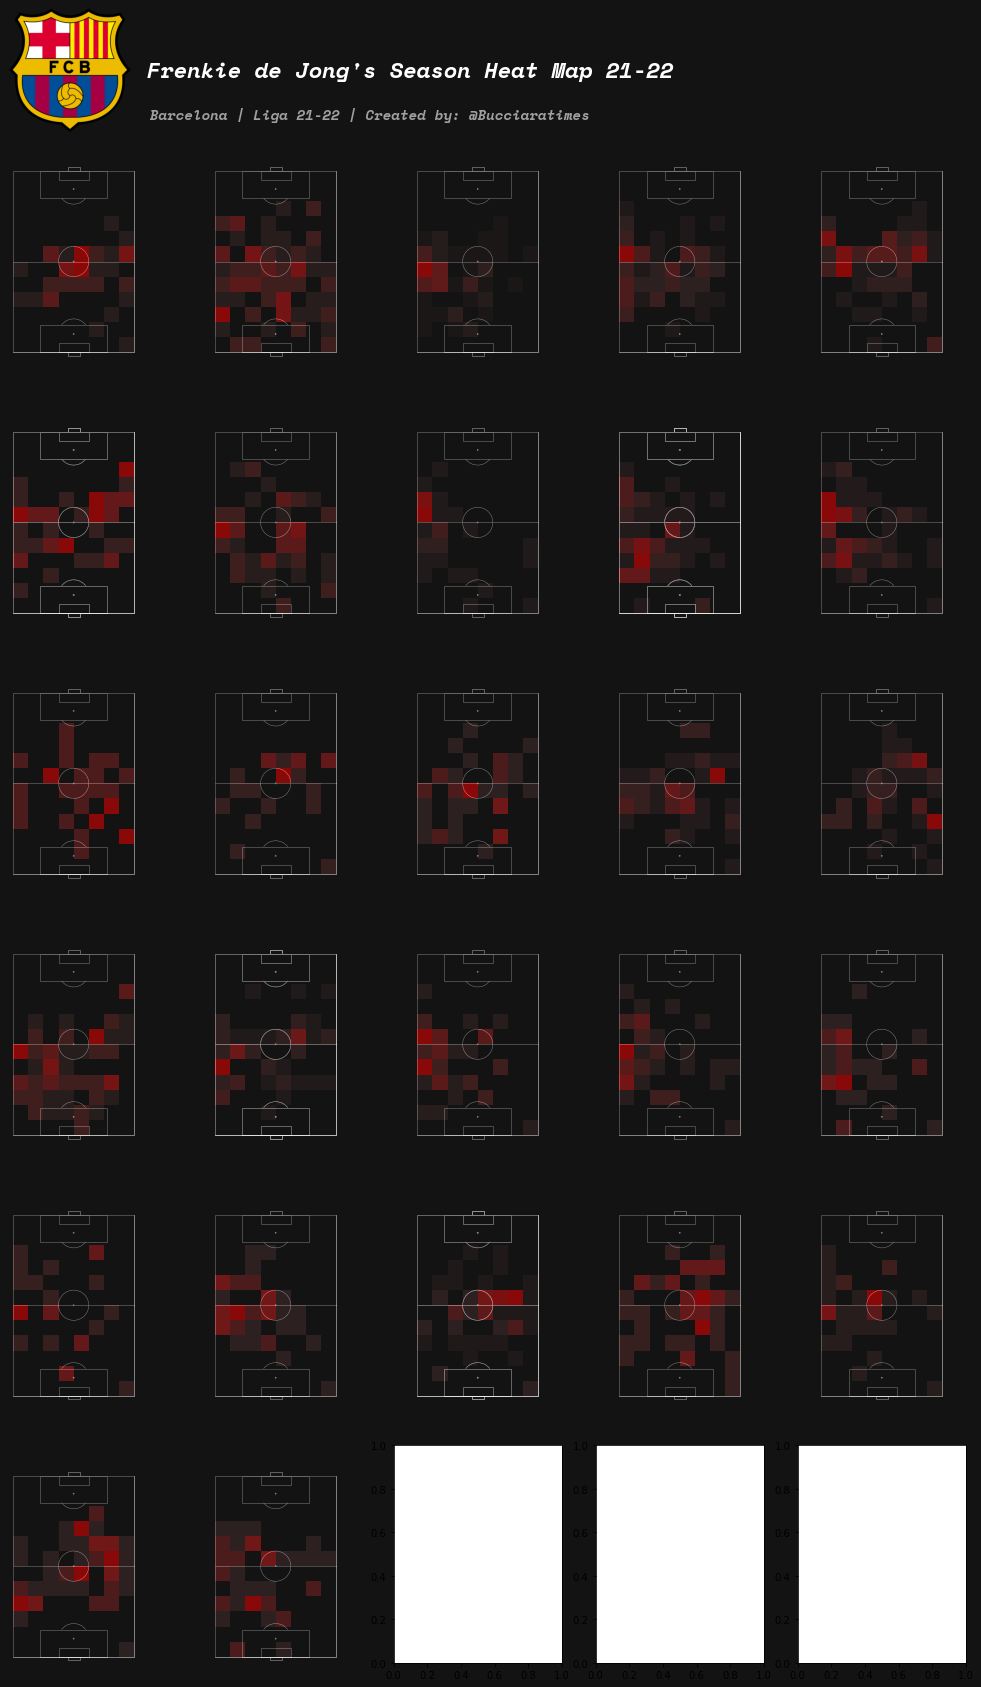

In [50]:
fig,axes = plt.subplots(6,5,figsize=(17.5,28))
fig.set_facecolor("#131313")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=20
)

axes = axes.ravel()
j = 0
for i in range(0,32):

    pitch.draw(ax=axes[j])
#     print(i)
#     if len(a[i][a[i]["playerId"]==pId]) <= 0:
#         continue
    try:
        if len(b[i][b[i]["playerId"]==pId]) <=0:
            continue
    except:
        print(i)
    axes[j].invert_xaxis()
    plotHeatMap2(df=b[i],playerId=pId,pitch=pitch,ax=axes[j],time=90)
    j = j+1
    
# pdf1,a =  plotStartPos(df,axes[0],teamId,279423,0)
# pdf2,b = plotStartPos(df2,axes[1],65,279423,0)
# URL = "https://upload.wikimedia.org/wikipedia/en/thumb/7/79/Ajax_Amsterdam.svg/1200px-Ajax_Amsterdam.svg.png"
URL = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
mark = Image.open(urlopen(URL))
ax_image = add_image(
    mark, fig, left=axes[0].get_position().x0, bottom=axes[0].get_position().y1-.015, width=0.1, height=0.1)  

fig_text(s=f" <{pdict[pId]}'s Season Heat Map 21-22>",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.03,
         color="#8C898C",
         highlight_colors=["#ffffff"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=22,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"  <{teamName.title()} | Liga 21-22 | Created by: @Bucciaratimes>",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.01,
         color="#8C898C",
         highlight_colors=["#a0a0a0"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

plt.savefig('/work/output/fdjMapBarca.png', dpi=250, bbox_inches="tight",facecolor='#131313')

<AxesSubplot:>

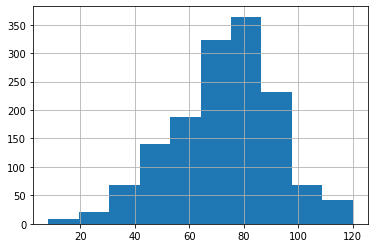

In [75]:
pdf1["endX"].hist(bins=10)

<AxesSubplot:>

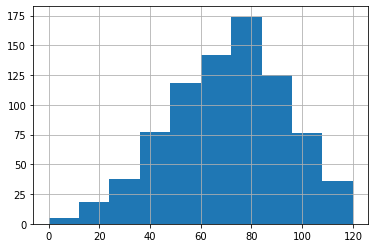

In [76]:
pdf2["endX"].hist(bins=10)

In [1]:
import matplotlib
print(matplotlib.get_configdir())

/root/.config/matplotlib


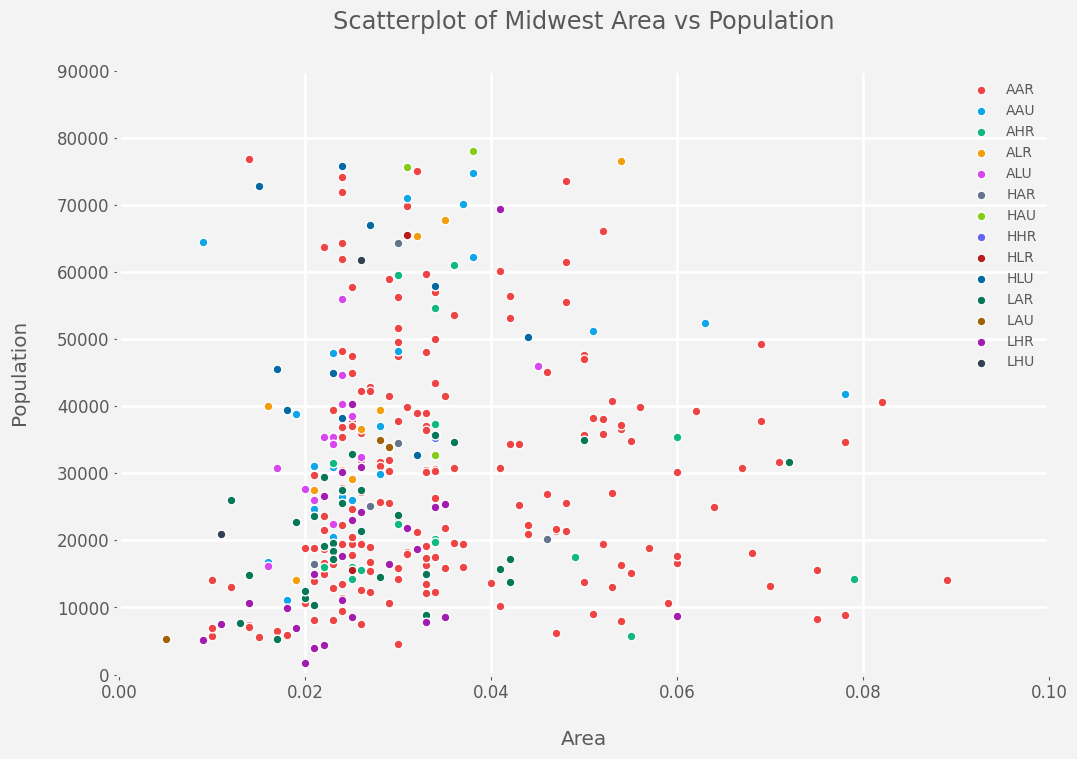

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("gray_style")

# Import dataset
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s=40, label=str(category))

# Decorations
plt.gca().set(xlim = (0.0, 0.1), ylim = (0, 90000),
              xlabel = 'Area', ylabel = 'Population')
plt.title("Scatterplot of Midwest Area vs Population")
plt.legend()
plt.show()


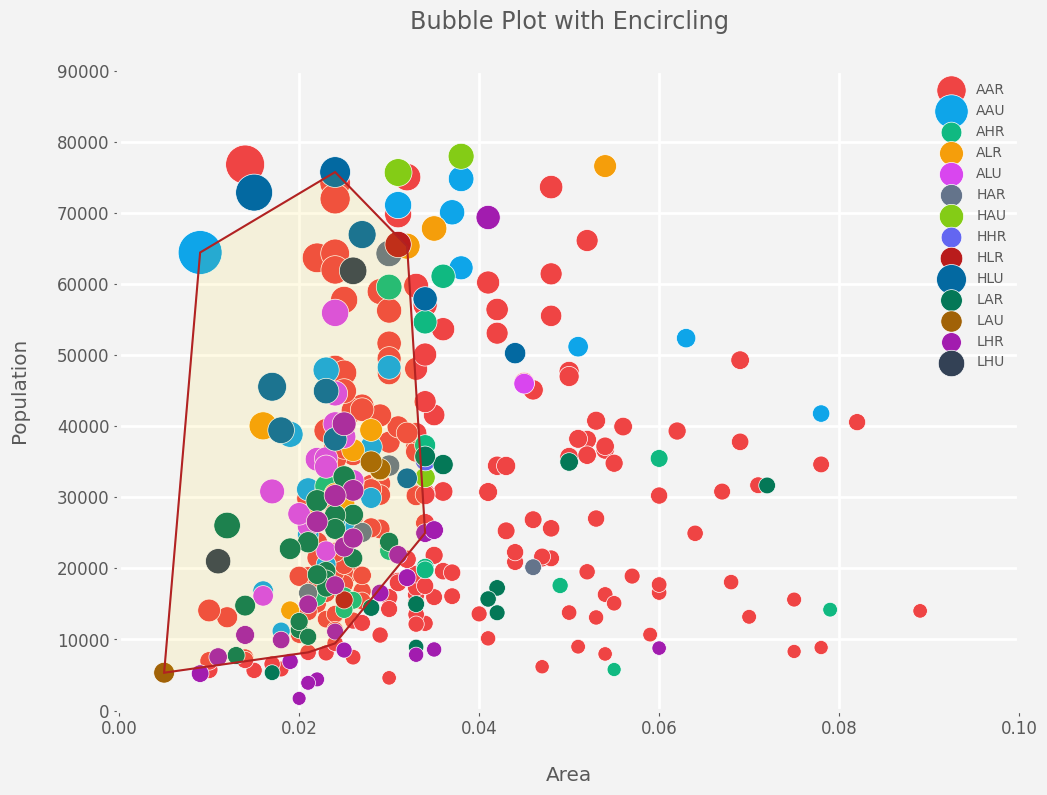

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


from matplotlib import patches
from scipy.spatial import ConvexHull

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

categories = np.unique(midwest['category'])

# Step 2: Draw Scatterplot with unique color for each category
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', label=str(category), linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.title("Bubble Plot with Encircling")
plt.legend()
plt.subplots_adjust(left=0.15, bottom=0.1, top=0.9, right=0.9)
plt.show()

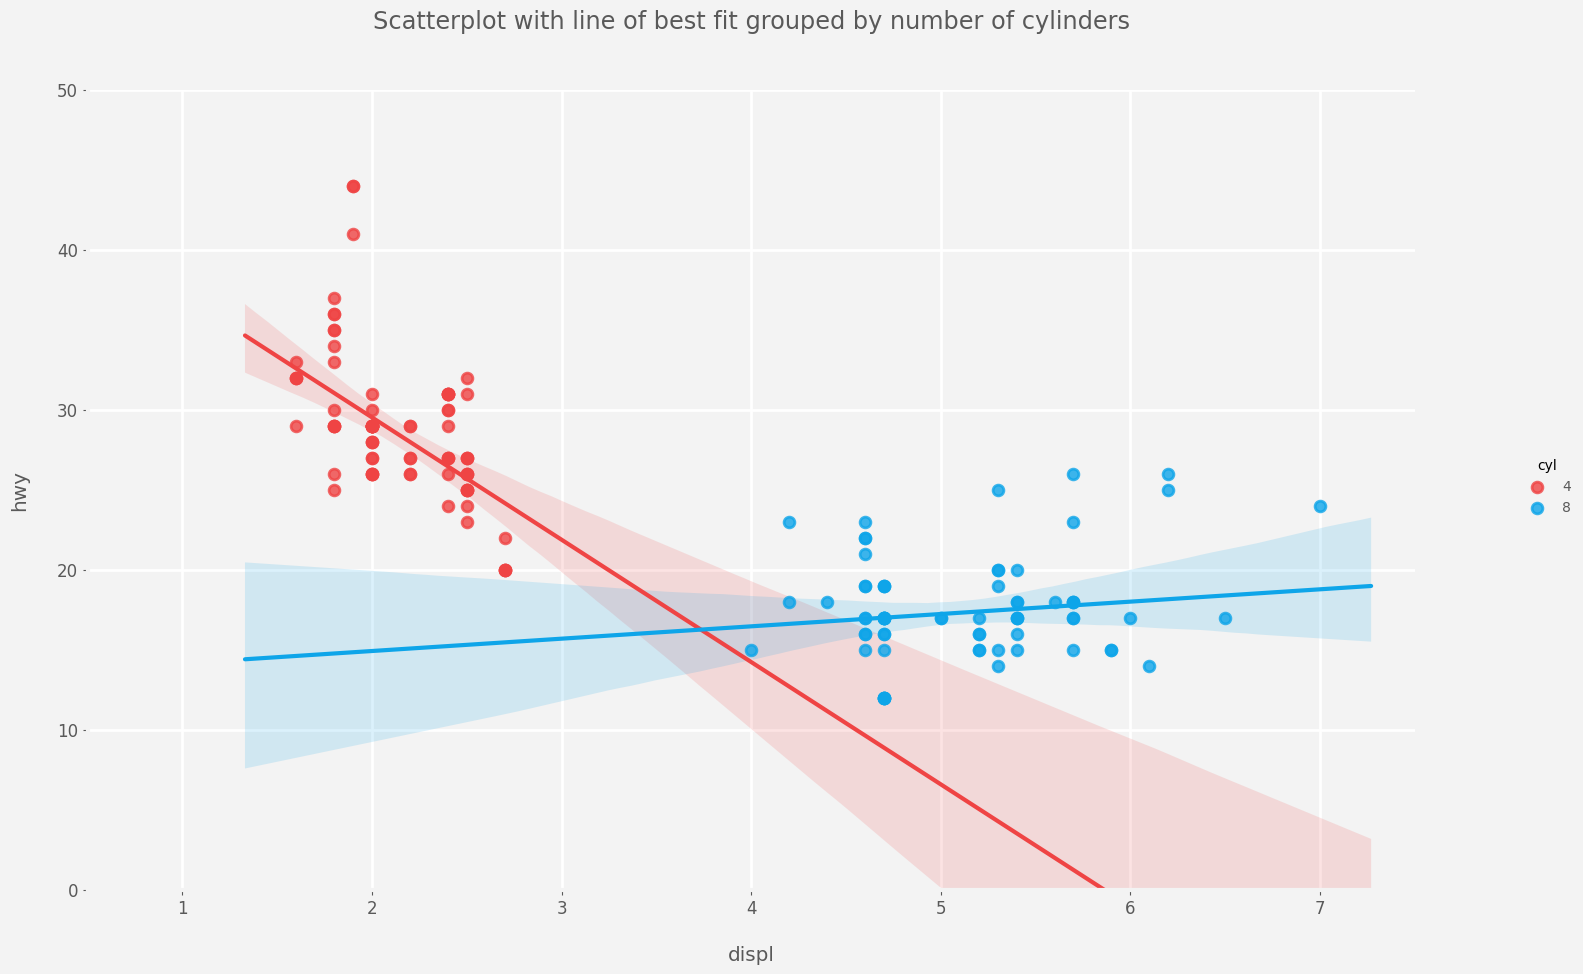

In [5]:
"""
seaborn.lmplot メソッドは、seaborn.regplot の機能に加えて、複数のグラフをまとめて 1 度に出力する機能 (FacetGrid) を持っている点が特徴。

注意点
・FacetGridを返すreplot、catplot、lmplotはdataframeのキーを使用しないタイトルは描画できない。
　grid.fig.suptitle()を使用すれば、キーを使用しないタイトルはグラフ上部に重ねてなら表示することはできる。
"""
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
grid = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,
            height=10, aspect=1.6, robust=True, truncate=False, # truncate=False:回帰直線を端から端までプロット
            scatter_kws=dict(s=60))

# Decorations
grid.fig.suptitle("Scatterplot with line of best fit grouped by number of cylinders", c="#595959")
grid.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)
plt.show(block = True)

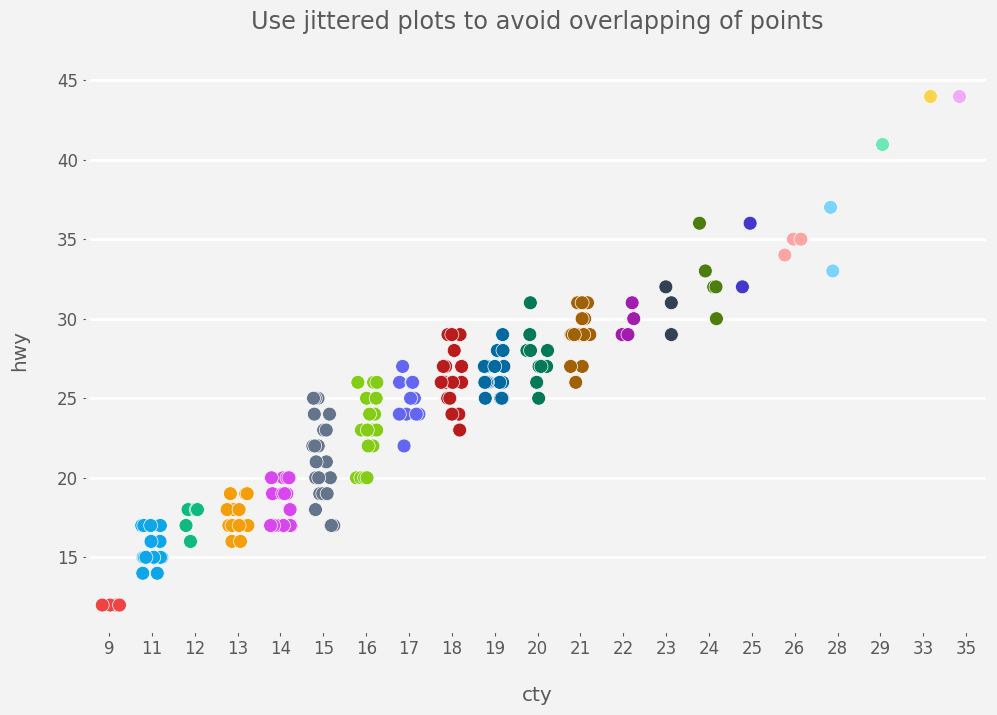

In [7]:
"""
jitter plot：
    本来の値に小さな値をランダムに足し引きし、点が重ならないようにグラフ化

一つの調査項目に対して、複数サンプルが調査され、中には同じ値が得られる場合がある。
このようなデータを点グラフで表すと、同じ値は同じ所にプロットされる。
そのため、点と点が重なってデータの数を確認できなくなる。
そこで、このようなデータに微小な値を足したり、引いたりして、
本来の値から少しだけずらすことで、点が重ならないような点グラフを描けるようになる。

引用元：https://stats.biopapyrus.jp/python/jitterplot.html
"""
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=10, linewidth=.5, edgecolor="#ffffff")

# Decorations
plt.title('Use jittered plots to avoid overlapping of points')
plt.subplots_adjust(left=0.15, bottom=0.15, top=0.85, right=0.9)
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

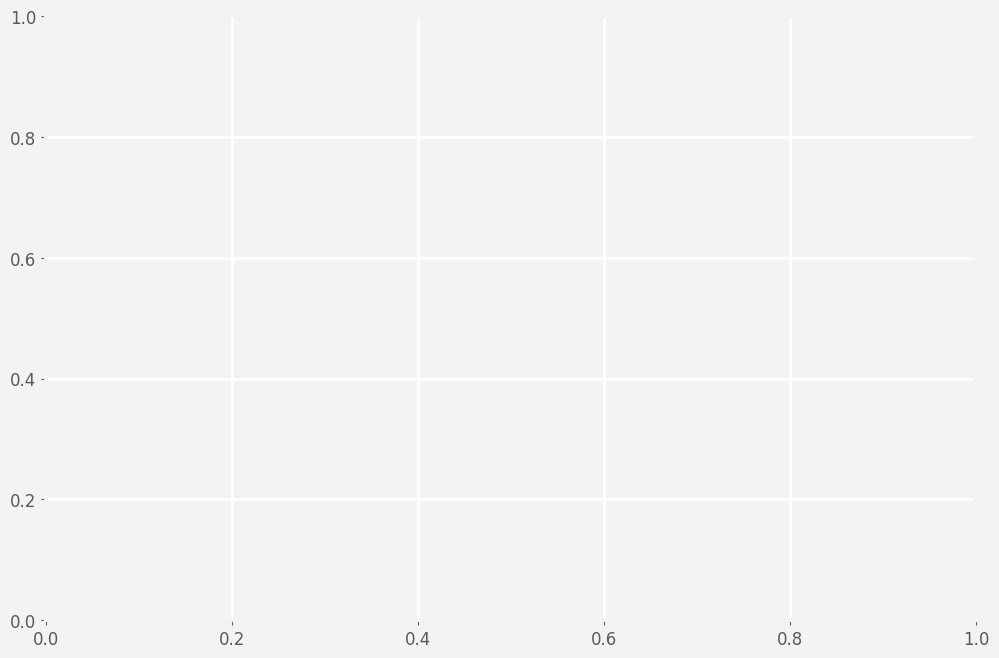

In [9]:
"""
注意事項
・python 3.10系ではmatplotlib<=3.2がインストールできずプロット不可。
    下記のバージョンでプロット確認。
    python : 3.6.8
    matplotlib : 3.1.0
    seaborn : 0.11.2
    pandas : 1.1.5
"""

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
a = df_counts.cty
b = df_counts.hwy
s = df_counts.counts*2
c = type(a)
sns.stripplot(df_counts.cty, df_counts.hwy, size=s)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap')
plt.show()

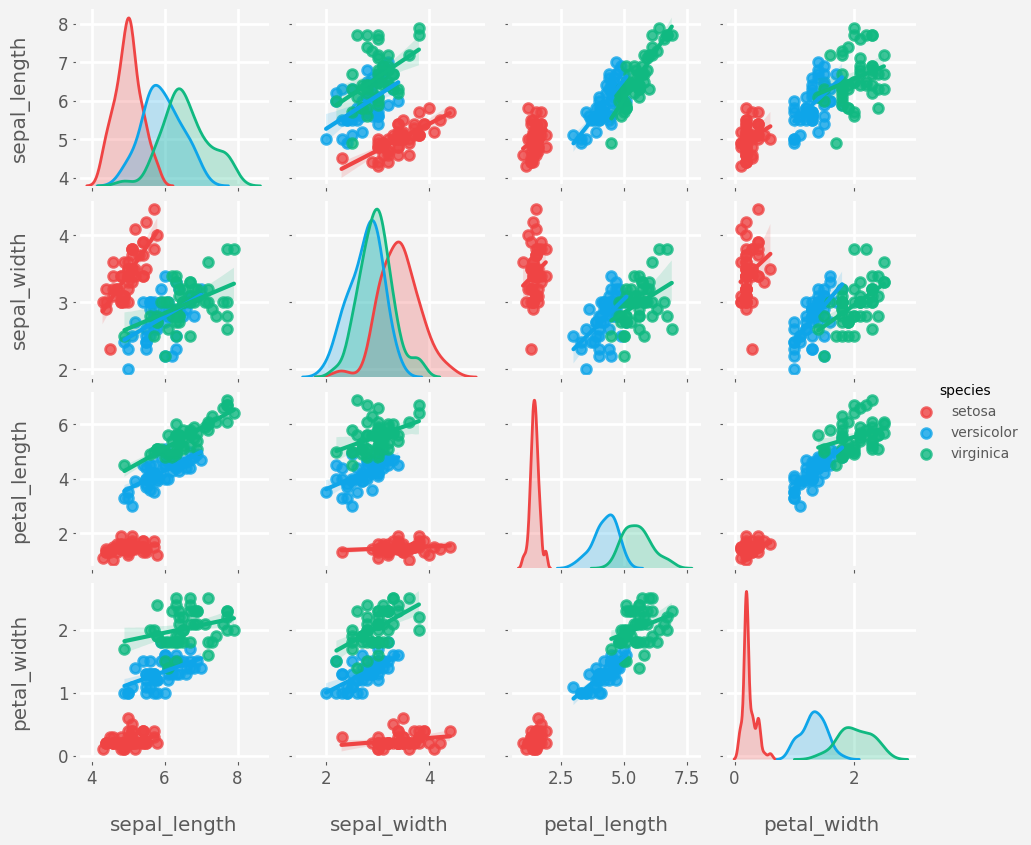

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = sns.load_dataset('iris')

# Plot
sns.pairplot(df, kind="reg", hue="species")
plt.subplots_adjust(left=0.15, bottom=0.15, top=0.9, right=0.9)
plt.show()

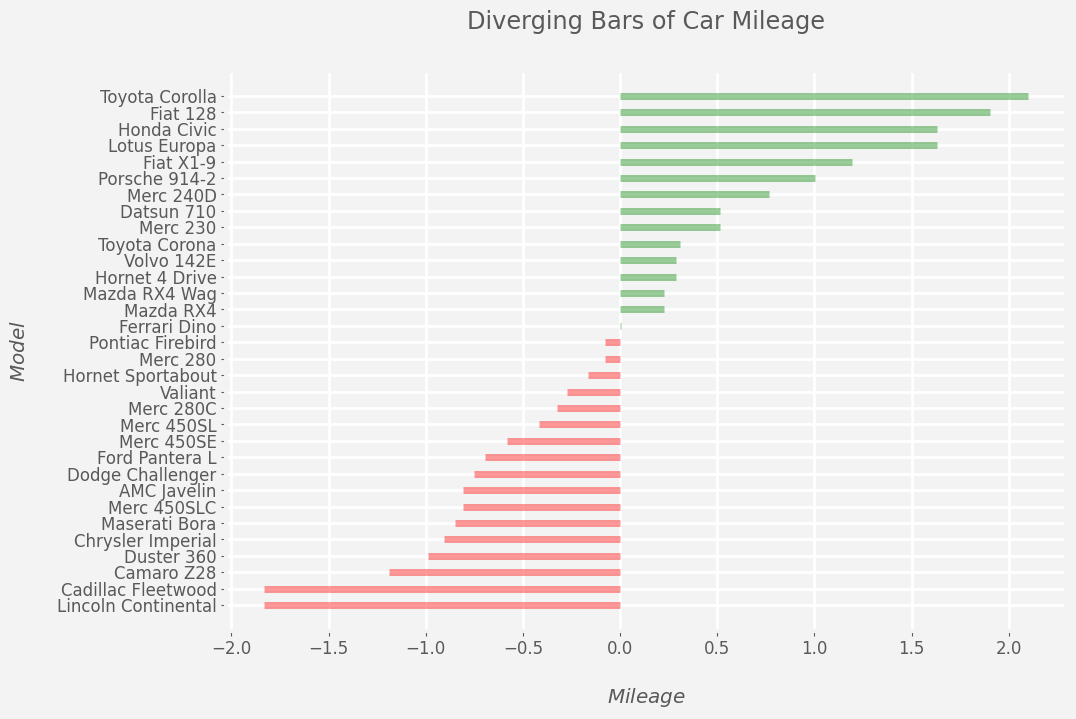

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars)
plt.title('Diverging Bars of Car Mileage')
plt.subplots_adjust(left=0.2, bottom=0.15, top=0.85, right=0.9)
plt.show()

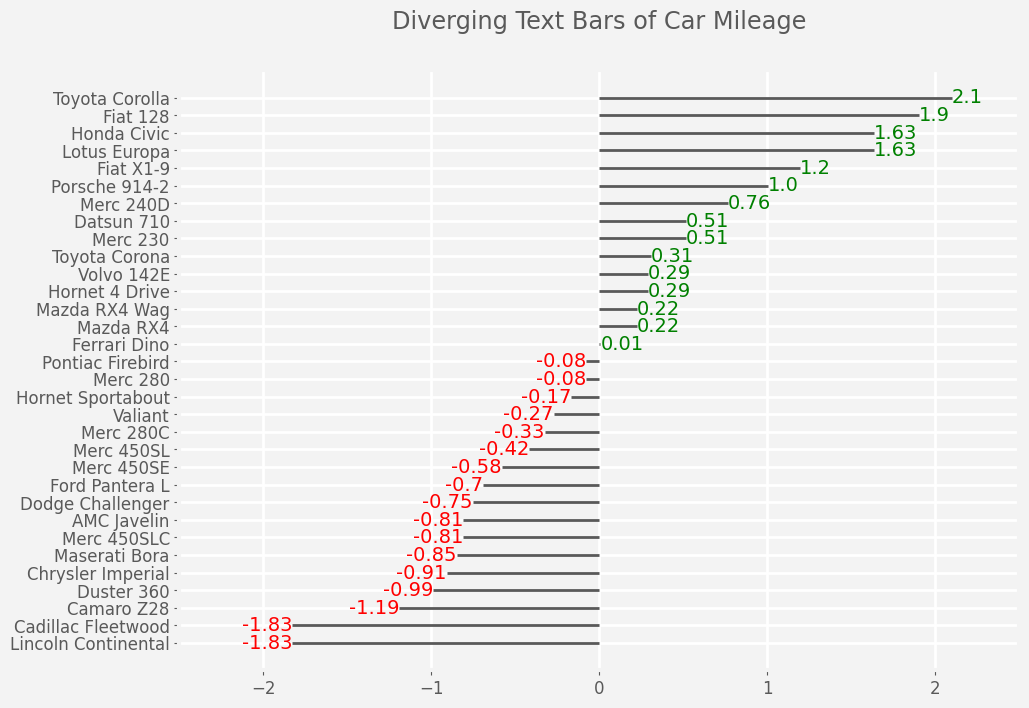

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, colors=["#595959"])
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations
plt.yticks(df.index, df.cars)
plt.title('Diverging Text Bars of Car Mileage')
plt.xlim(-2.5, 2.5)
plt.subplots_adjust(left=0.2, bottom=0.1, top=0.85, right=0.9)
plt.show()

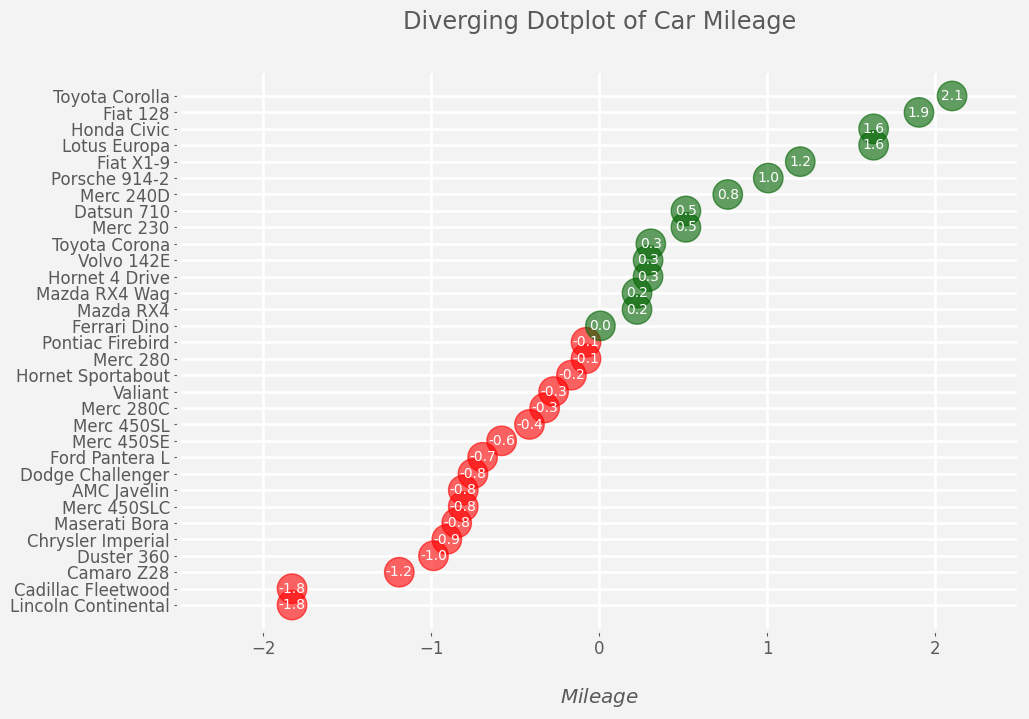

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage')
plt.xlabel('$Mileage$')
plt.xlim(-2.5, 2.5)
plt.subplots_adjust(left=0.2, bottom=0.15, top=0.85, right=0.9)
plt.show()

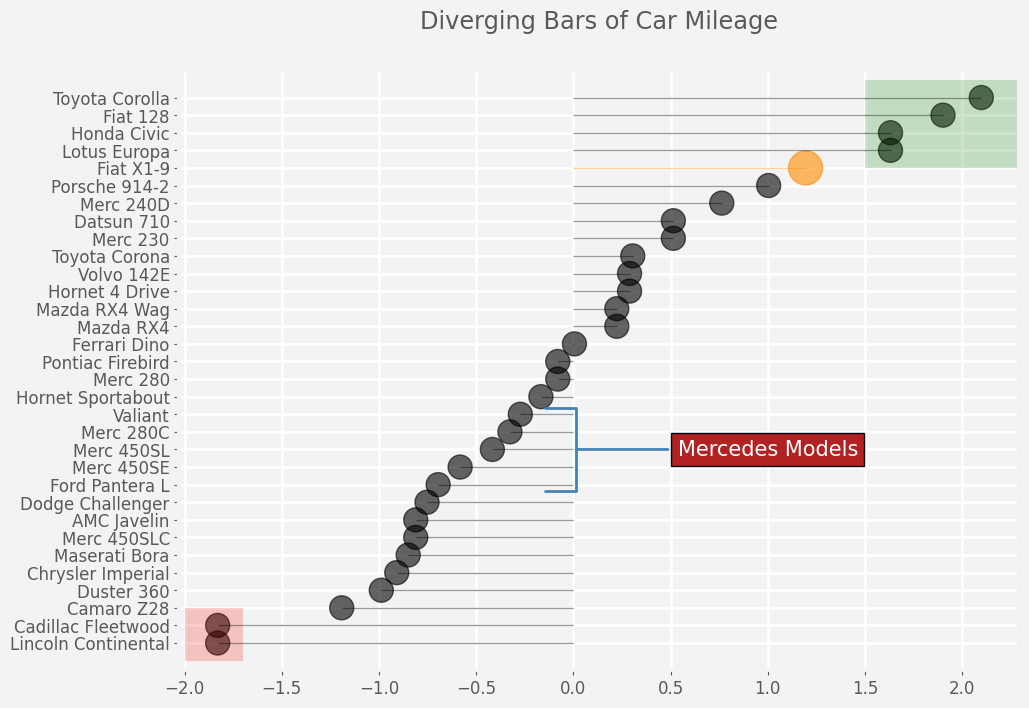

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# Draw plot
import matplotlib.patches as patches

plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage')
plt.subplots_adjust(left=0.2, bottom=0.1, top=0.85, right=0.9)
plt.show()

<ipython-input-23-5681d637c918>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


Rectangle(xy=(0.57, 0.05), width=0.33, height=0.15, angle=0) <class 'matplotlib.patches.Rectangle'>


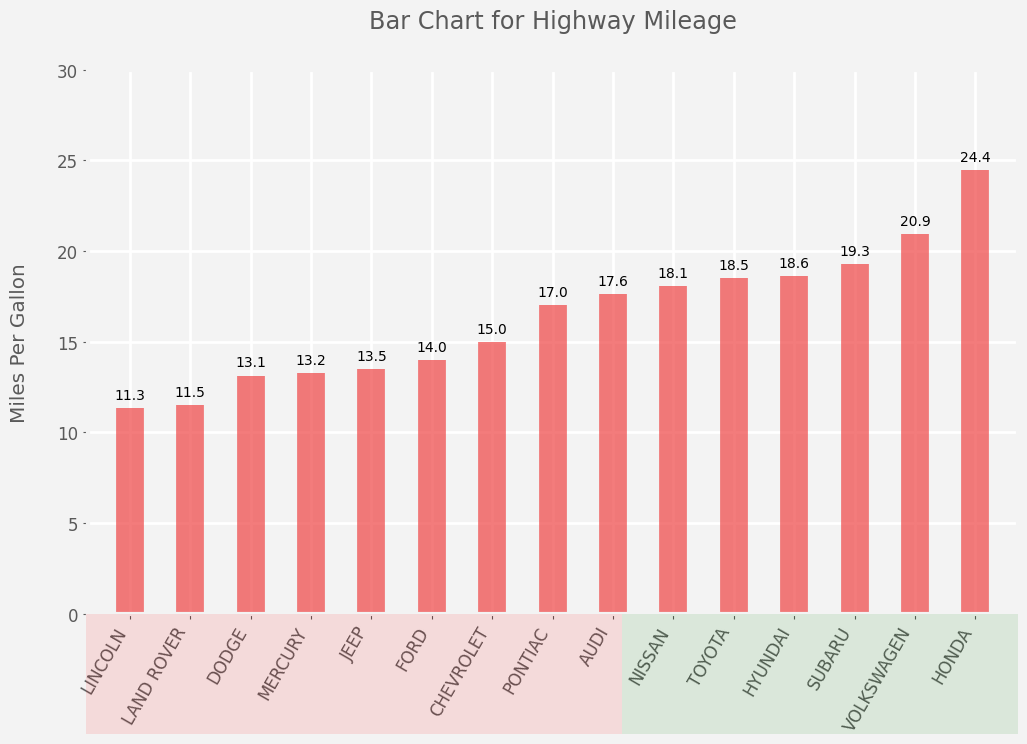

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots()
ax.vlines(x=df.index, ymin=0, ymax=df.cty, alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage')
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right')

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, 0.05), width=.33, height=.15, alpha=.1, facecolor='green', transform=fig.transFigure)
print(p1, type(p1))
p2 = patches.Rectangle((.124, 0.05), width=.446, height=.15, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.subplots_adjust(bottom=0.2)
plt.show()

<ipython-input-25-dd668addc768>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())


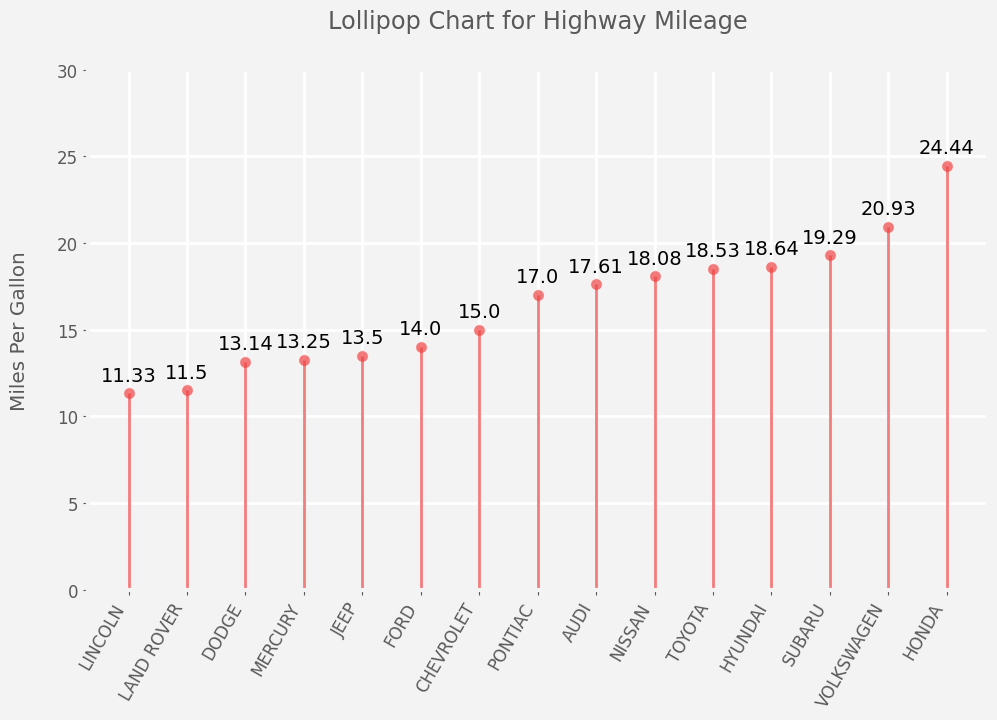

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots()
ax.vlines(x=df.index, ymin=0, ymax=df.cty, alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage')
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right'})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.subplots_adjust(left=0.15, bottom=0.2, top=0.85, right=0.9)
plt.show()

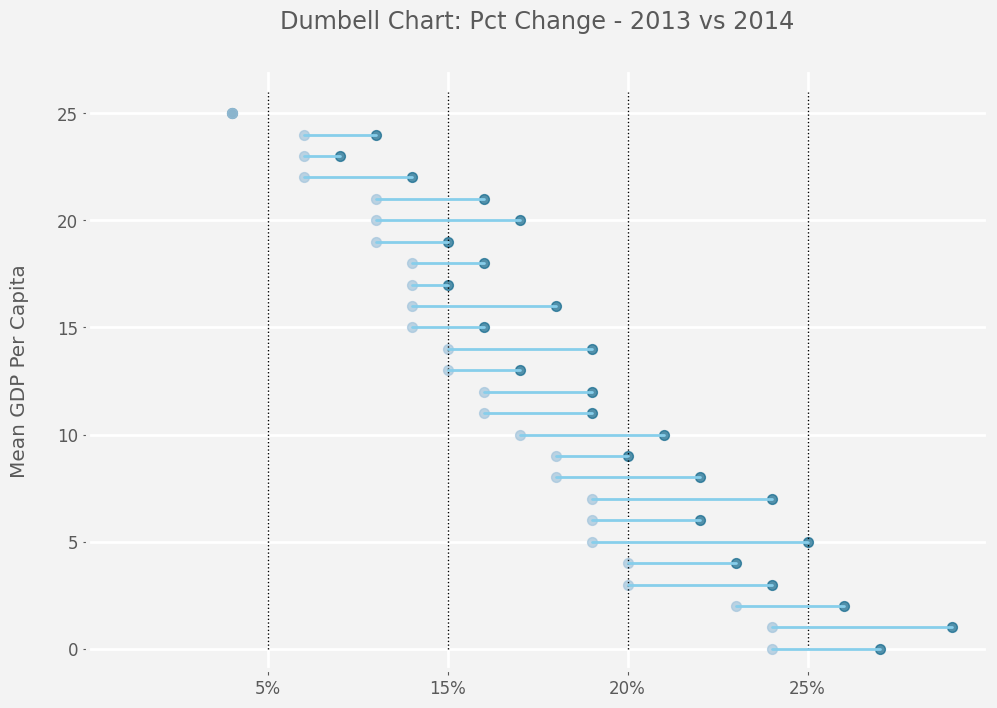

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots()

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014")
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
plt.subplots_adjust(left=0.15, bottom=0.1, top=0.85, right=0.9)
plt.show()
